<a href="https://colab.research.google.com/github/Yashfin10/Hands-on-ML-Basic-to-Advance-/blob/master/Decision_tree_%26_Random_Forest_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-20.csv')

In [3]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [4]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

###Data preprocessing

In [6]:
churn_df['International plan'].drop_duplicates()

0      No
47    Yes
Name: International plan, dtype: object

In [7]:
# Label encoder is used for mapping text data to 0,1,2,3,4,5....
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [8]:
le_encoder.fit((churn_df['International plan']).drop_duplicates())

LabelEncoder()

In [9]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])

In [10]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [11]:
le_encoder.fit((churn_df['Voice mail plan']).drop_duplicates())

LabelEncoder()

In [12]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])

In [13]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


###Correlation

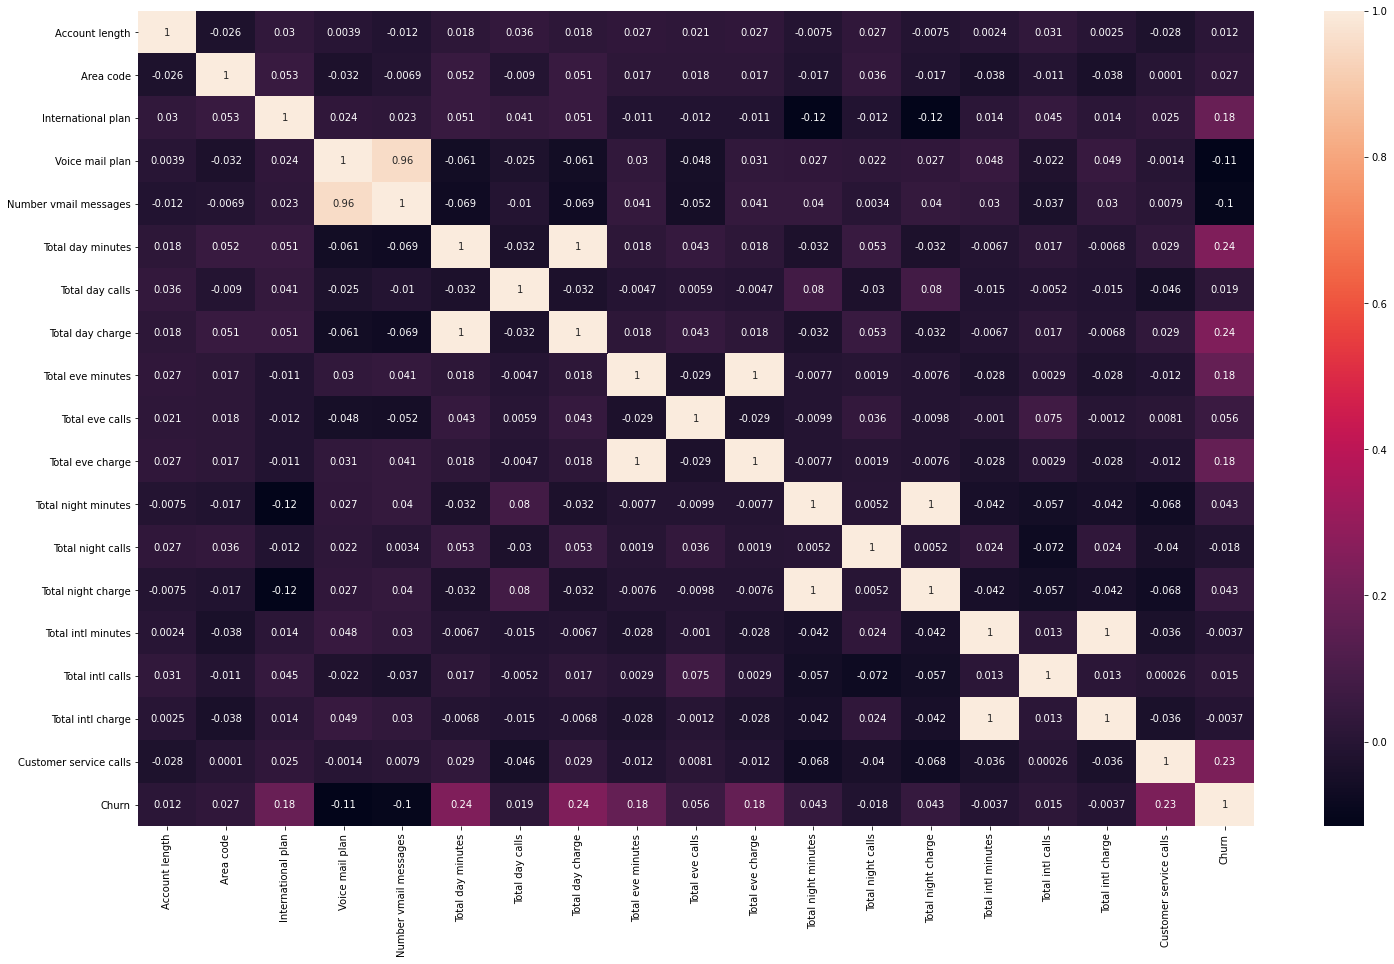

In [14]:
plt.figure(figsize=(25,15))
sns.heatmap(churn_df.corr('pearson'), annot=True)

### Feature selection

In [15]:
churn_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [16]:
X = churn_df.drop(['State','Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl charge', 'Churn'], axis = 1)
Y = churn_df['Churn']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


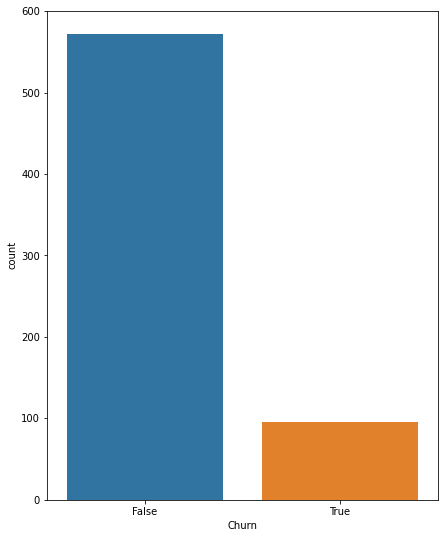

In [17]:
plt.figure(figsize=(7,9))
sns.countplot('Churn', data=churn_df)
# here we can see the sample is biased so we have to fix it

In [18]:
churn_df['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

##Data Augmentation

In [19]:
# regenerating sample by using "bootstrapping" method to generate samples by randomly selecting data for each class
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn']== False]
df_1 = churn_df[churn_df['Churn']== True]

In [20]:
# Apply resampling
df_1_upsample = resample(df_1, n_samples = 286, replace = True, random_state = 123)

In [21]:
churn_df1 = pd.concat([df_0, df_1_upsample])

In [22]:
churn_df1['Churn'].value_counts()

False    572
True     286
Name: Churn, dtype: int64

In [23]:
X = churn_df1.drop(['State','Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl charge', 'Churn'], axis = 1)
Y = churn_df1['Churn']

In [24]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,117,408,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1
3,111,415,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2
4,49,510,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1
5,36,408,0,1,146.3,128,162.5,80,129.3,109,14.5,6,0
6,65,415,0,0,211.3,120,162.6,122,134.7,118,13.2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,101,408,0,0,89.7,118,260.1,79,170.1,93,13.5,11,5
387,119,510,0,0,81.9,75,253.8,114,213.1,125,8.9,1,2
593,128,408,0,0,227.9,130,302.6,71,191.5,82,5.5,7,1
500,58,415,0,0,247.2,116,303.7,103,105.4,94,9.3,2,2


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

##Decision tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=9, random_state=0) # here max_depth cuts a branch from decision tree thus dec train accuracy

In [27]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
clf_tree.score(X_test, Y_test)

0.9534883720930233

In [29]:
clf_tree.score(X_train, Y_train)

0.9883381924198251

##Plotting decision tree

In [30]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [31]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file= dot_data, feature_names= list(X.columns), filled=True, rounded = True )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

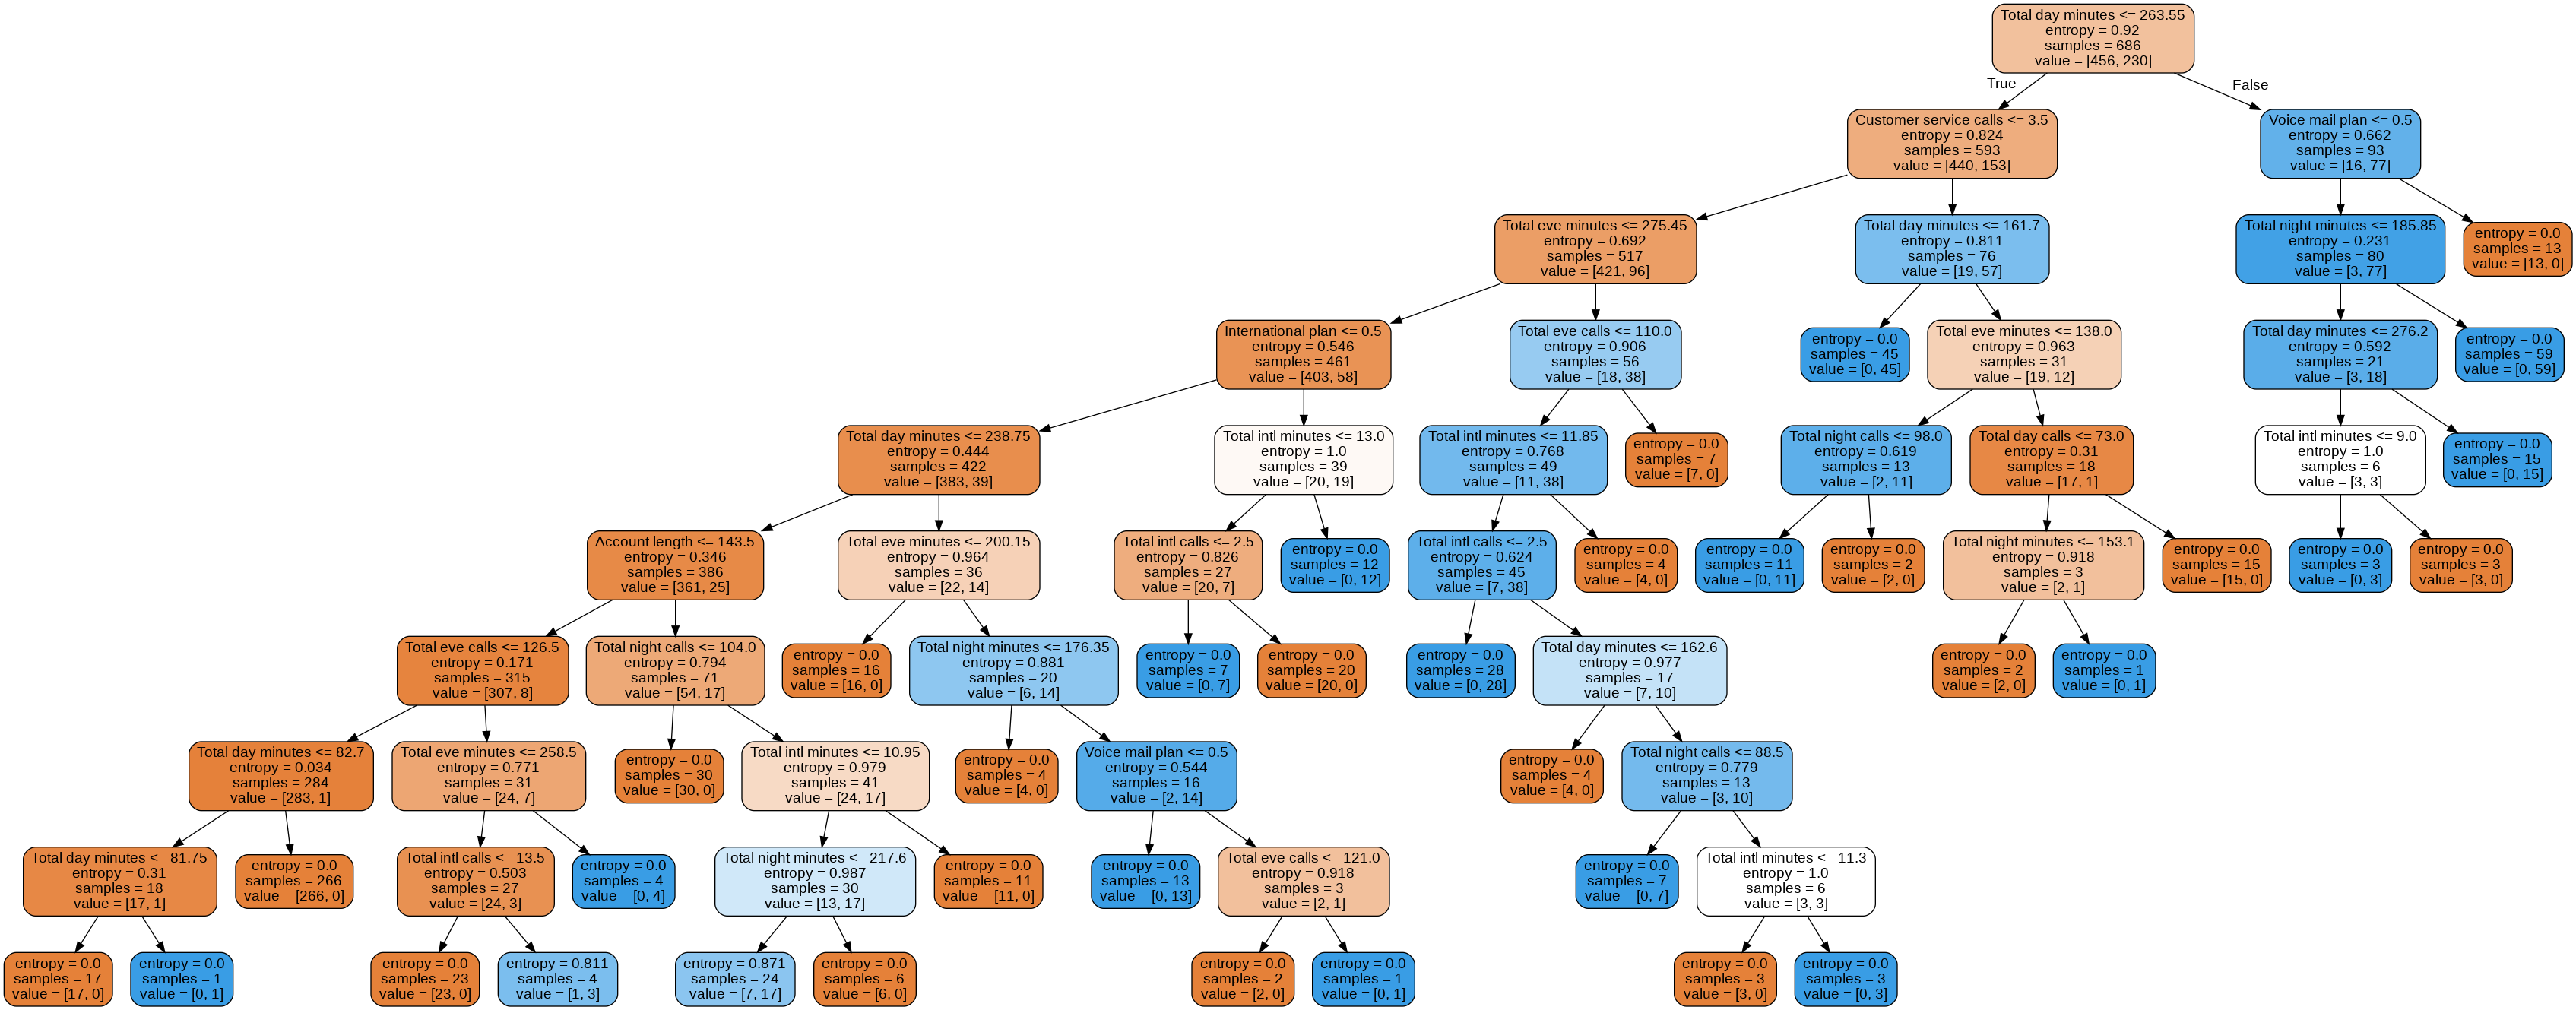

In [32]:
Image(graph.create_png())

##Classification Metrics

In [33]:
yhat = clf_tree.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, yhat)

array([[108,   8],
       [  0,  56]])

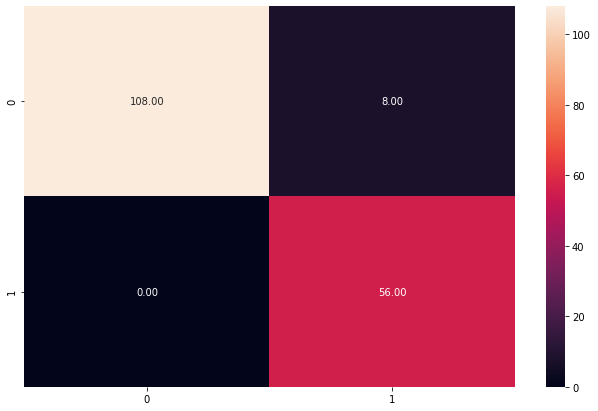

In [35]:
plt.figure(figsize = (11,7))
sns.heatmap(confusion_matrix(Y_test, yhat), annot=True, fmt = '0.2f',)

In [36]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

       False       1.00      0.93      0.96       116
        True       0.88      1.00      0.93        56

    accuracy                           0.95       172
   macro avg       0.94      0.97      0.95       172
weighted avg       0.96      0.95      0.95       172



##Random Forest
####Ensemble learning - Votes from multiple trees are used for prediction

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# n_estimators = number of decision tree, depth of each tree is max_depth(9 or 11), bootstrap = randomly selecting samples
clf_rf = RandomForestClassifier(bootstrap= True, max_depth=10, n_estimators= 150, random_state=0, criterion='entropy')

In [39]:
clf_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
clf_rf.score(X_test, Y_test)

0.9709302325581395

In [41]:
clf_rf.score(X_train, Y_train)

0.9985422740524781

In [42]:
yhat = clf_tree.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, yhat)

array([[108,   8],
       [  0,  56]])

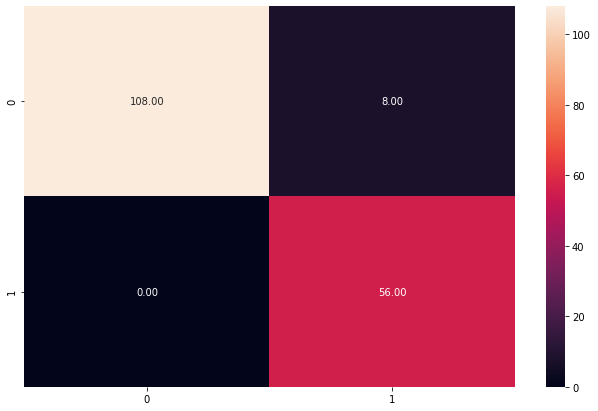

In [44]:
plt.figure(figsize = (11,7))
sns.heatmap(confusion_matrix(Y_test, yhat), annot=True, fmt = '0.2f',)

In [45]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

       False       1.00      0.93      0.96       116
        True       0.88      1.00      0.93        56

    accuracy                           0.95       172
   macro avg       0.94      0.97      0.95       172
weighted avg       0.96      0.95      0.95       172

